# Data Visualization

Connect to the database

In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("m4_survey_data.sqlite")

In [2]:
query = """
SELECT COUNT(*)
FROM master
"""

df = pd.read_sql_query(query, conn)


,COUNT(*)
0,11398


## List all tables


In [3]:
query = """
SELECT name as Table_Name FROM
sqlite_master WHERE 
type = 'table'
"""

pd.read_sql_query(query, conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## How to run a group by query

In [4]:
query = """
SELECT Age, COUNT(*) as count
FROM master
group by Age
order by Age
"""

pd.read_sql_query(query, conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Visualizing distrtibution of data

### Histogram

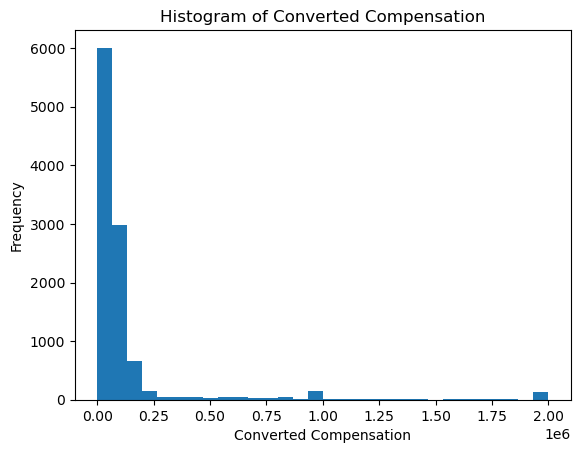

In [17]:
import matplotlib.pyplot as plt


query = "SELECT * FROM master"

df = pd.read_sql_query(query,conn)

plt.hist(df['ConvertedComp'], bins=30)
plt.title('Histogram of Converted Compensation')
plt.ylabel('Frequency')
plt.xlabel('Converted Compensation')
plt.show()

### Scatter Plot

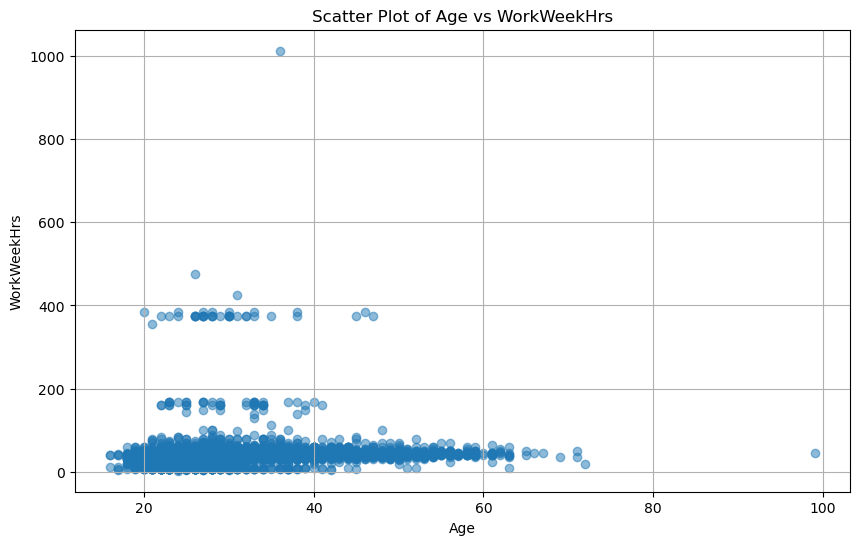

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5)
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)
plt.show()

### Bubble Plot

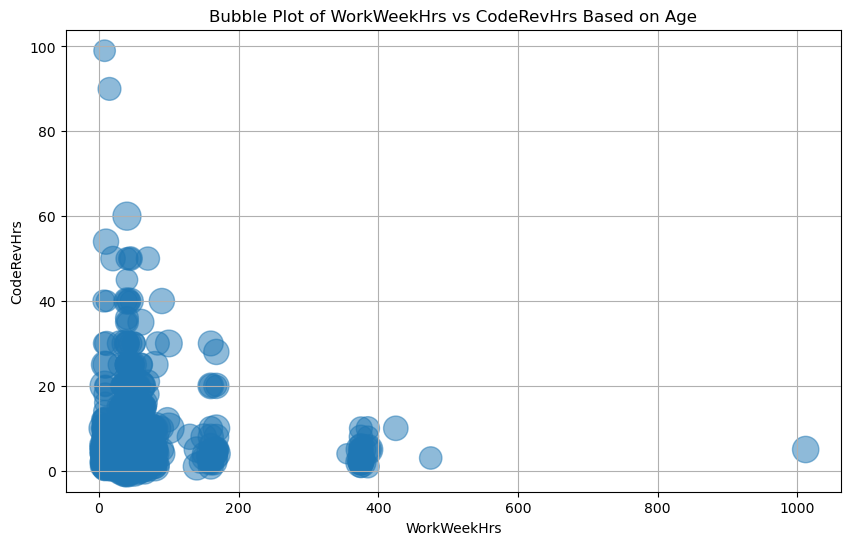

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age'] * 10, alpha=0.5)

plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs Based on Age')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.grid(True)
plt.show()

In [27]:
top5_db = df['DatabaseDesireNextYear'].value_counts().nlargest(5)
top5_db

DatabaseDesireNextYear
PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
Name: count, dtype: int64

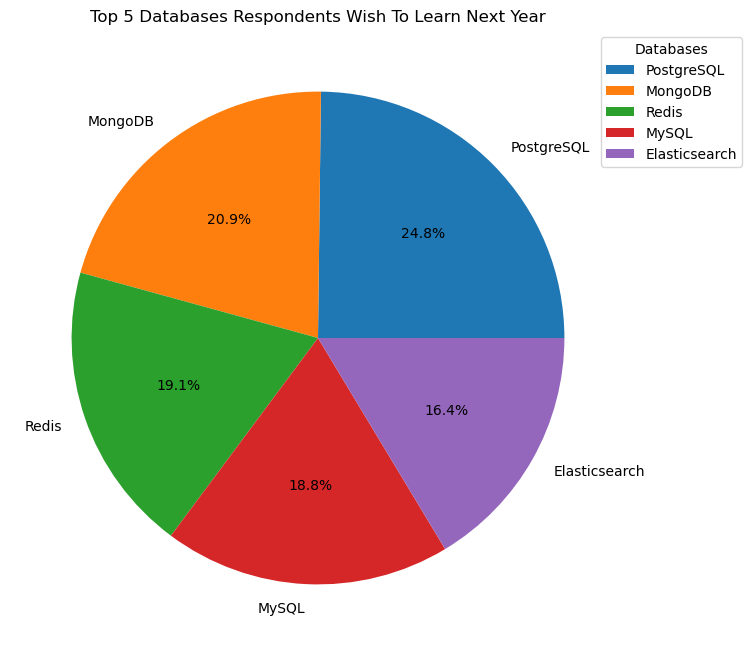

In [43]:
databases = top5_db.index
counts= top5_db.values

plt.figure(figsize=(10,8))
plt.pie(counts, labels=databases, autopct='%1.1f%%')
plt.legend(databases, title='Databases', loc="upper right", bbox_to_anchor=(1.2,1))
plt.title('Top 5 Databases Respondents Wish To Learn Next Year')
plt.show()

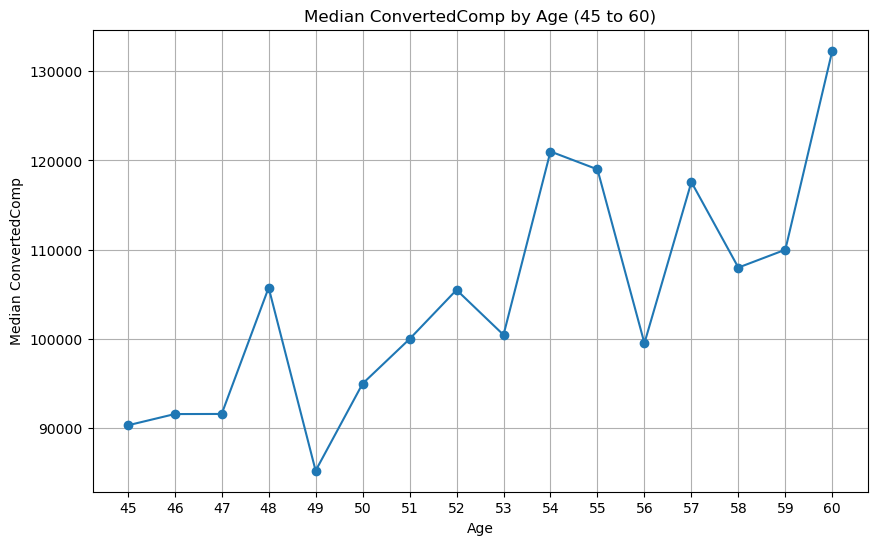

In [49]:
conn = sqlite3.connect("m4_survey_data.sqlite")

query = """
SELECT ConvertedComp, Age
FROM master 
WHERE Age BETWEEN 45 AND 60
"""

# Load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Calculate the median of ConvertedComp for each age
median_comp_by_age = df.groupby('Age')['ConvertedComp'].median().reset_index()


# Plot
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age['Age'], median_comp_by_age['ConvertedComp'], marker='o', linestyle='-')
plt.title('Median ConvertedComp by Age (45 to 60)')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.xticks(range(45, 61))  # Ensure all ages are shown on the x-axis
plt.show()